In [44]:
# import the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [45]:
# acquire the data
def get_data(url,columns_to_view=None):
    data = pd.read_csv(url)
    if columns_to_view is None:
        the_columns = data.columns
    else:
        the_columns = columns_to_view
    data = data[the_columns]
    return data
data = get_data('https://github.com/cbrown-clu/class_data/raw/refs/heads/main/data/abalone.csv',
                columns_to_view=['Length','Rings','Shell weight'])

In [46]:
data.head()

Length  Rings  Shell weight
0   0.455     15         0.150
1   0.350      7         0.070
2   0.530      9         0.210
3   0.440     10         0.155
4   0.330      7         0.055

In [78]:
# create the model of the shell weight
def create_model(data):
    # Separate into features and target
    features = data.drop(columns=['Shell weight'])
    target = data['Shell weight']
    # Standardize the data
    scaler = StandardScaler()
    scaler.fit(features)
    data_scaled = scaler.transform(features)
    
    # Create a DataFrame with the scaled data
    data_scaled_df = pd.DataFrame(data_scaled, columns=features.columns)
    
    # Create a knn model
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(data_scaled_df, target)
    return knn_model,scaler
knn_model,scaler = create_model(data)
# Save the model to a file
import joblib
joblib.dump(knn_model, 'models/knn_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [88]:
# load the model
import joblib
def load_model(model_path,scaler_path):
    # Load the model from the file
    knn_model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    # Return the model and scaler
    return knn_model,scaler
knn_model,scaler = load_model('models/knn_model.pkl','models/scaler.pkl')

In [89]:
features = data.drop(columns=['Shell weight'])
target = data['Shell weight']
# Standardize the data
data_scaled = scaler.transform(features)

# Create a DataFrame with the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=features.columns)
knn_model.predict(data_scaled_df)

array([0.1658, 0.0741, 0.1989, ..., 0.2932, 0.3711, 0.5043])

In [ ]:
# make predictions with the model
def predict(Length,Rings):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({'Length': [Length], 'Rings': [Rings]})
    
    # Standardize the input data using the same scaler used for training
    input_data_scaled = scaler.transform(input_data)
    input_data_scaled = pd.DataFrame(input_data_scaled, columns=input_data.columns)
    
    # Make predictions using the loaded model
    prediction = knn_model.predict(input_data_scaled)
    
    return prediction[0]
# prediction = predict(Length,Rings)

In [91]:
predict(0.3,8)

0.03780000000000001

(0.6, 15)
0.322


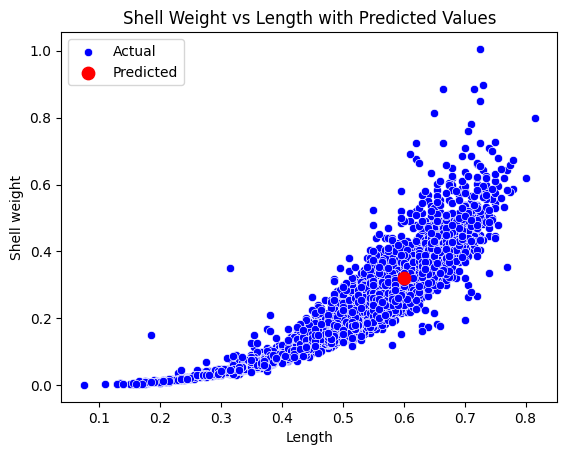

In [94]:
# plot the shell weight versus the length
# and then plot a predicted value
def plot_shell_weight(data, inputs):
    print(inputs)
    weight = predict(inputs[0],inputs[1])
    print(weight)
    fig, ax = plt.subplots()
    sns.scatterplot(data=data, x='Length', y='Shell weight', color='blue', label='Actual',ax=ax)
    plt.scatter(inputs[0], weight, s=80,color='red', label='Predicted')
    plt.xlabel('Length')
    plt.ylabel('Shell weight')
    plt.title('Shell Weight vs Length with Predicted Values')
    plt.legend()
    return fig
fig = plot_shell_weight(data, (0.6,15))
plt.show()

In [ ]:
# jupyter nbconvert --to script ex_4_modeling.ipynb 